# Importing All the libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 127s 1us/step


In [4]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


# Reshaping the output array

In [5]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [6]:
y_train.shape

(50000,)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Text(0.5, 0, 'frog')

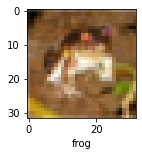

In [11]:
plt.figure(figsize = (15,2))
plt.imshow(X_train[0])
plt.xlabel(classes[y_train[0]])

Text(0.5, 0, 'deer')

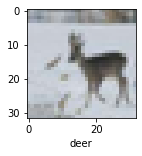

In [13]:
plt.figure(figsize = (15,2))
plt.imshow(X_train[20])
plt.xlabel(classes[y_train[20]])

# Normalizing the training data

In [14]:
X_train.max()

255

In [15]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [16]:
X_train.max()

1.0

# Now let's build a CNN model to train our data

In [17]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [18]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Let's fit our model

In [19]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 11s 4ms/step - loss: 1.6812 - accuracy: 0.3875
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1172 - accuracy: 0.6066
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9693 - accuracy: 0.6604
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8684 - accuracy: 0.6956
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8020 - accuracy: 0.7225
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7427 - accuracy: 0.7410
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6813 - accuracy: 0.7627
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6346 - accuracy: 0.7803
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5992 - accuracy: 0.7915
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.55

In [20]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9211 - accuracy: 0.7010


[0.9211467504501343, 0.7009999752044678]

# Now let's predict

In [21]:
y_pred = cnn.predict(X_test)

In [22]:
yc = [np.argmax(element) for element in y_pred]

In [23]:
classes[yc[0]]

'cat'

Text(0.5, 0, 'cat')

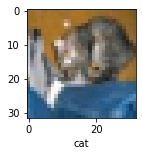

In [25]:
plt.figure(figsize = (15,2))
plt.imshow(X_test[0])
plt.xlabel(classes[yc[0]])

Text(0.5, 0, 'dog')

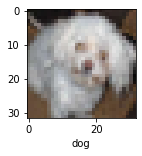

In [26]:
plt.figure(figsize = (15,2))
plt.imshow(X_test[1000])
plt.xlabel(classes[yc[1000]])

Text(0.5, 0, 'horse')

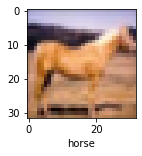

In [27]:
plt.figure(figsize = (15,2))
plt.imshow(X_test[700])
plt.xlabel(classes[yc[700]])